In [ ]:
import numpy as np
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, classification_report, make_scorer, f1_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8, 6))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

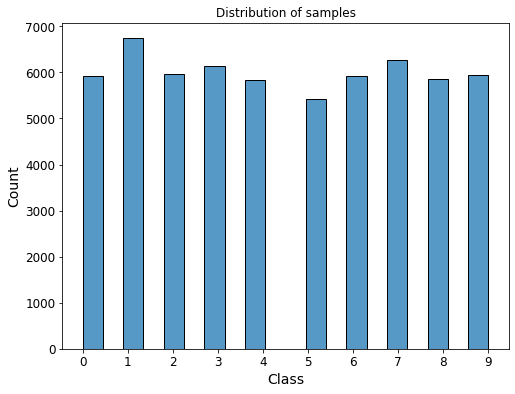

In [ ]:
plt.figure()
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of samples')
plt.show()

# Building the model

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(multi_class='multinomial', solver='sag'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [ ]:
pipe[-1].coef_.shape

(10, 784)

In [ ]:
pipe[-1].intercept_.shape

(10,)

In [ ]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

# Model evaluation

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



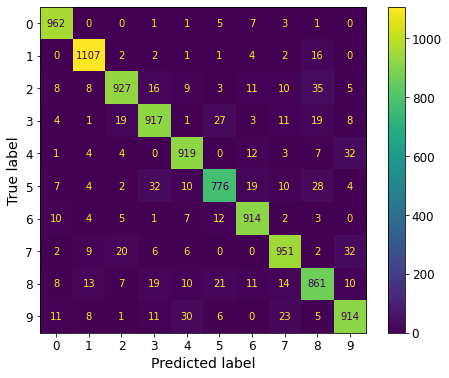

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

In [ ]:
scorer = make_scorer(f1_score, average='micro')
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', 
                                                LogisticRegressionCV(cv=5, multi_class='multinomial', solver='sag', 
                                                                     scoring=scorer, max_iter=100, random_state=1729))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegressionCV(cv=5, multi_class='multinomial',
                                      random_state=1729,
                                      scoring=make_scorer(f1_score, average=micro),
                                      solver='sag'))])

Checking the best hyperparameters that resulted from the cross-validation

In [ ]:
pipe[-1].C_

In [ ]:
pipe[-1].l1_ratio_

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)